(0.0, 3.301216044273e-12)

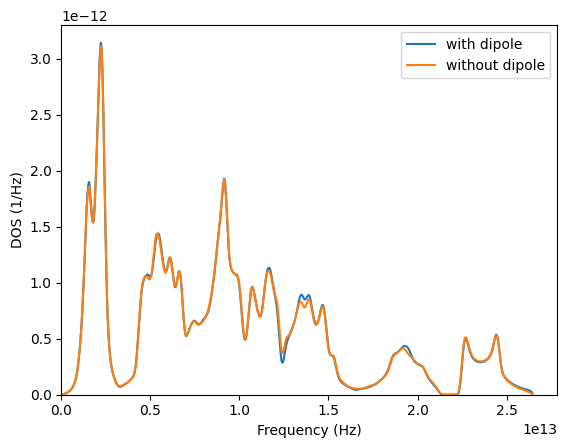

In [20]:
# Plot and compare the phonon DOS with and without the dipole correction
import numpy as np
import matplotlib.pyplot as plt

# Read in the data
with_dipole = np.loadtxt('with_dipole/vdos_4.00')
without_dipole = np.loadtxt('without_dipole/vdos_4.00')

# Plot the data
plt.plot(with_dipole[:,0], with_dipole[:,1], label='with dipole')
plt.plot(without_dipole[:,0], without_dipole[:,1], label='without dipole')
plt.xlabel('Frequency (Hz)')
plt.ylabel('DOS (1/Hz)')
plt.legend()
plt.xlim(0)
plt.ylim(0)         


In [35]:
# Scale the area of the phonon DOS
# Specify the number of atoms you would like to scale the phonon DOS to
num_atoms = 5

# The area under the curve of the phonon DOS is normalized to ~ 3N in YPHON
num_atoms_3N = num_atoms * 3

# List all the files in the directory with_dipole
import os
file_list = os.listdir('with_dipole')

# Keep only the file names which have vdos in file_list
vdos_files = [file for file in file_list if 'vdos' in file]

# Loop over the vdos files
for file in vdos_files:
    data = np.loadtxt('with_dipole/' + file)

    # Remove the negative frequencies
    data = data[data[:,0] > 0]
    
    # Insert a zero frequency and zero DOS at the beginning of the array
    data = np.insert(data, 0, [0, 0], axis=0)
    
    # Calculate the area under the curve
    area = np.trapz(data[:,1], data[:,0])
    print(area)
    
    # Scale the area of the phonon DOS to 3N
    data[:,1] = data[:,1] * num_atoms_3N / area
    
    # Calculate the new area under the curve
    area = np.trapz(data[:,1], data[:,0])
    
    # Save the scaled phonon DOS to a folder called scaled_phonon_dos
    if not os.path.exists('with_dipole/scaled_phonon_dos'):
        os.mkdir('scaled_phonon_dos')
        
    np.savetxt('scaled_phonon_dos/' + file, data)
    
    
    
    

    



14.982387277999209
14.984586054912448
14.991022811357258
14.994029049774033
14.994091710636859


In [ ]:
% Adjust the area under the curve of the phonon DOS to 3N
for LL = 1:num_volumes

    ff = strcat(fdos, file_index(LL)); 
    ff = ff{1}; 
    phonon_dos = load(ff);

    frequency = phonon_dos(:,1); % (m x 1) Hz or s^(-1)
    dos = phonon_dos(:,2); % (m x 1) 1/Hz or s

    % Remove any negative frequencies and corresponding DOS
    nn = size(frequency);
    ii = 0;
    for L = 1:nn(1)
        if (frequency(L) < 0)
            ii = ii+1;  
            dos(L)=0; 
        end
    end
    num_negative_omg = ii;

    df = frequency(2:end) - frequency(1:end-1);
    
    % Use the middle value for the frequency and dos to evaluate the
    % integral
    mid_f = (frequency(2:end) +  frequency(1:end-1)) * 0.5;
    mid_dos = (dos(2:end) + dos(1:end-1)) * 0.5;

    rectangles = df.*mid_dos;
    sum_rectangles = sum(rectangles)

    round_sum_rectangles = round(sum_rectangles);
    
    %%% When would num_atoms_3N every <= 1? Check with Dr. Shang.
    if num_atoms_3N > 1
        round_sum_rectangles = num_atoms_3N; 
    end

    positive_frequencies = num_negative_omg + 1;
    new_phonon_dos = [0 0];

    % Scale the area under the curve of the phonon DOS to 3N
    new_phonon_dos = [new_phonon_dos; phonon_dos(positive_frequencies:end,1), ...
        (phonon_dos(positive_frequencies:end,2)*round_sum_rectangles/sum_rectangles)];

    f1 = strcat(file_index(LL));
    fnew = strcat('vdos_', f1);
    ff1 = fnew{1}; 
    eval(['save ' ff1 ' new_phonon_dos -ascii']);

    frequency = new_phonon_dos(:,1);      
    dos = new_phonon_dos(:,2);       
    df = frequency(2:end) - frequency(1:end-1);
    mid_f = (frequency(2:end) + frequency(1:end-1)) * 0.5;
    mid_dos = (dos(2:end) + dos(1:end-1)) * 0.5;
    rectangles = df.*mid_dos;
    sum_rectangles = sum(rectangles)  
    
    figure
    plot(phonon_dos(:,1), phonon_dos(:,2), frequency, dos, '--')
    legend('Old phonon DOS', 'New phonon DOS')
    xlabel('Frequency (Hz)')
    ylabel('DOS (1/Hz)')
    title(ff1, 'Interpreter', 'none')
end
